## 1.朴素贝叶斯种类

1.GauusianNB  高斯分布（正态分布）

In [1]:
#导入包
import pandas as pd 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#导入数据集
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
#且分数据集
Xtrain,Xtest,ytrain,ytest = train_test_split(iris.data, iris.target,random_state = 12)

In [4]:
#建模
clf = GaussianNB()
clf.fit(Xtrain, ytrain)

GaussianNB()

In [5]:
#在测试集上执行预测，proba到处的是每个样本属于某类的概率
clf.predict(Xtest)

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1])

In [6]:
clf.predict_proba(Xtest)

array([[1.00000000e+000, 2.32926069e-017, 1.81656357e-023],
       [4.28952299e-154, 2.48576754e-002, 9.75142325e-001],
       [1.00000000e+000, 7.45528845e-018, 3.79800436e-024],
       [3.59748710e-076, 9.99751806e-001, 2.48194200e-004],
       [2.20411871e-239, 4.45798016e-009, 9.99999996e-001],
       [1.23795145e-173, 1.95814902e-003, 9.98041851e-001],
       [2.45866589e-206, 2.34481513e-007, 9.99999766e-001],
       [1.00000000e+000, 2.61810906e-017, 2.67446831e-023],
       [3.07448595e-259, 9.07196639e-011, 1.00000000e+000],
       [1.00000000e+000, 1.14549667e-010, 3.00314173e-017],
       [1.64566141e-101, 9.87428016e-001, 1.25719837e-002],
       [1.00000000e+000, 5.62770009e-016, 8.77233124e-022],
       [1.00000000e+000, 9.78098062e-014, 4.81247272e-020],
       [1.00000000e+000, 3.96616431e-015, 3.17162008e-021],
       [2.58159395e-110, 7.85918892e-001, 2.14081108e-001],
       [8.01004975e-208, 8.36611920e-006, 9.99991634e-001],
       [2.27845999e-193, 5.52863568e-004

In [7]:
#测试准确率
accuracy_score(ytest,clf.predict(Xtest))

0.9736842105263158

2.MultinomialNB(多项式朴素贝叶斯）  多元离散值常用

3.BernonlliNB(伯努利朴素贝叶斯）  二元离散值或者很稀疏的多元离散值常用

# 2.朴素贝叶斯之鸢尾花数据实验

In [8]:
import numpy as np
import pandas as pd
import random

In [9]:
dataSet = pd.read_csv('iris.csv', header = None)
dataSet.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1.切分训练集和测试集

In [10]:
"""
函数功能：随机切分训练集和测试集
参数说明：
        dataSet : 输入的数据集
        rate : 训练集所占比例
返回：切好的训练集和测试集
"""
def randSplit(dataSet, rate):
    l = list(dataSet.index) #提取出索引
    random.shuffle(l)  #随机打乱索引
    dataSet.index = l #将打乱后的索引重新赋值给数据集
    n = dataSet.shape[0] #总行数
    m = int(n * rate) #训练集的数量
    train = dataSet.loc[range(m),:] #提取前m个记录作为训练集
    test  = dataSet.loc[range(m, n), :]
    dataSet.index = range(dataSet.shape[0]) #更新原数据集的索引
    test.index = range(test.shape[0])   #更新测试集索引
    return train, test
    

In [11]:
train,test = randSplit(dataSet,0.8)

In [12]:
train

,0,1,2,3,4
0,6.8,3.2,5.9,2.3,virginica
1,4.9,3.1,1.5,0.2,setosa
2,5.6,3.0,4.1,1.3,versicolor
3,6.0,2.2,5.0,1.5,virginica
4,4.6,3.2,1.4,0.2,setosa
5,4.4,3.0,1.3,0.2,setosa
6,4.8,3.1,1.6,0.2,setosa
7,6.1,2.9,4.7,1.4,versicolor
8,5.0,3.2,1.2,0.2,setosa
9,5.7,4.4,1.5,0.4,setosa


In [13]:
test

,0,1,2,3,4
0,4.7,3.2,1.3,0.2,setosa
1,5.8,2.7,5.1,1.9,virginica
2,6.7,2.5,5.8,1.8,virginica
3,5.1,3.8,1.5,0.3,setosa
4,7.2,3.2,6.0,1.8,virginica
5,6.8,2.8,4.8,1.4,versicolor
6,5.0,2.3,3.3,1.0,versicolor
7,5.0,3.5,1.6,0.6,setosa
8,6.7,3.3,5.7,2.1,virginica
9,5.7,2.5,5.0,2.0,virginica


3. 构建高斯朴素贝叶斯分类器

In [14]:
def gnb_classify(train,test):
    labels = train.iloc[:,-1].value_counts().index  #提取训练集的标签种类
    mean = []  #存放每个类别的均值
    std = []  #存放每个类别的方差
    result = []  #存放测试集的预测结果
    for i in labels:
        item = train.loc[train.iloc[:,-1] == i, :]  #分别提取出每一种类别
        m = item.iloc[:, : -1].mean()  #当前类别的平均值
        s = np.sum((item.iloc[:,: -1] - m)**2)/(item.shape[0])  #当前类别的方差
        mean.append(m) #将当前类别的平均值追加至列表
        std.append(s) #将当前类别的方差追加至列表
    means = pd.DataFrame(mean, index = labels)  #变成DF格式，索引为类标签
    stds = pd.DataFrame(std, index = labels)  #变成DF格式，索引为类标签
    for j in range(test.shape[0]):
        iset = test.iloc[j,:-1].tolist() #当前测试实例
        iprob = np.exp(-1*(iset - means)**2/(stds*2))/(np.sqrt(2*np.pi*stds))  #正态分布公式
        prob = 1 #初始化当前实例总概率
        for k in range(test.shape[1] - 1): #便利每个特征
            prob *= iprob[k]  #特征概率之积即为当前实例概率
            cla = prob.index[np.argmax(prob.values)] #返回最大概率的类别
        result.append(cla)
    test['predict'] = result
    acc = (test.iloc[: ,-1] == test.iloc[:,-2]).mean()  #计算预测准确率
    print(f'模型预测准确率为{acc}')
    return test

In [15]:
gnb_classify(train,test)

模型预测准确率为0.9666666666666667


,0,1,2,3,4,predict
0,4.7,3.2,1.3,0.2,setosa,setosa
1,5.8,2.7,5.1,1.9,virginica,virginica
2,6.7,2.5,5.8,1.8,virginica,virginica
3,5.1,3.8,1.5,0.3,setosa,setosa
4,7.2,3.2,6.0,1.8,virginica,virginica
5,6.8,2.8,4.8,1.4,versicolor,versicolor
6,5.0,2.3,3.3,1.0,versicolor,versicolor
7,5.0,3.5,1.6,0.6,setosa,setosa
8,6.7,3.3,5.7,2.1,virginica,virginica
9,5.7,2.5,5.0,2.0,virginica,virginica


# 3.使用朴素贝叶斯进行文档分类

In [16]:
'''
函数功能：创建实验数据集
参数说明：无参数
返回：
    dataSet: 划分好的样本词条
    classVec:类标签向量
'''
def loadDataSet():
    dataSet = [['my', 'dog','flea','problems','help','please'],
              ['maybe','not','take','him','to','dog','park','stupid'],
              ['my','dalmation','is','so','cute','I','love','him'],
              ['stop','posting','stupid','worthless','garbage'],
              ['mr','licks','ate','my','steak','how','to','stop','him'],
              ['quit','buying','worthless','dog','food','stupid']]   #切分好的七条
    classVec = [0,1,0,1,0,1]   #类别标签向量，1代表侮辱性词汇，0代表非侮辱性词汇
    return dataSet, classVec

In [17]:
dataSet, classVec = loadDataSet()

In [18]:
dataSet

[['my', 'dog', 'flea', 'problems', 'help', 'please'],
 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

In [19]:
classVec

[0, 1, 0, 1, 0, 1]

2.构建词汇表

In [20]:
"""
函数功能：将划分的样本词条整理成词汇表（不重复）
参数说明：
        dataSet: 划分好的样本词条
返回：
    vocabList: 不重复的词汇表
"""
def createVocabList(dataSet):
    vocabSet = set()     #创建一个空的集合
    for doc in dataSet:   #遍历dataSet种的每一条言论
        vocabSet = vocabSet | set(doc)   #取并集
        vocabList = list(vocabSet)
    return vocabList
    

In [23]:
vocabList = createVocabList(dataSet)
print(vocabList)

['stupid', 'is', 'help', 'problems', 'cute', 'food', 'not', 'him', 'worthless', 'buying', 'love', 'dalmation', 'stop', 'mr', 'steak', 'take', 'dog', 'licks', 'ate', 'to', 'I', 'so', 'garbage', 'how', 'please', 'quit', 'my', 'flea', 'park', 'posting', 'maybe']


3.获得训练集向量

In [28]:
"""
函数功能：根据vocabList词汇表，将inputSet向量化，向量的每个元素为1或0
参数说明：
        vocabList:词汇表
        inputSet : 切分好的词条列表中的一条
返回：
    returnVec :文档向量，词集模型
"""
def setOfwords2Vec(vocabList, inputSet):
    returnVec = [0] * len(vocabList)         #创建一个其中所含元素都为0的向量
    for word in inputSet:                    #遍历每个词条
        if word in vocabList:                #如果词条存在于词汇表中，则变为1
            returnVec[vocabList.index(word)] = 1
        else:
            print(f"{word} is not in my Vocabulary!")
    return returnVec                        #返回文档向量

所有词条向量列表

In [31]:
"""
函数功能：生成训练集向量列表
参数说明：
        dataSet:划分好的样本词条
返回：
        trainMat:所有的词条向量组成的列表
"""
def get_trainMat(dataSet):
    trainMat = []        #初始化向量列表
    vocabList = createVocabList(dataSet)   #生成词汇表
    for inputSet in dataSet:      #遍历样本词条中的每一条样本
        returnVec = setOfwords2Vec(vocabList, inputSet)  #将当前词条向量化
        trainMat.append(returnVec)      #追加到向量列表中
    return trainMat

In [32]:
trainMat = get_trainMat(dataSet)

In [34]:
print(trainMat)

[[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]


4. 朴素贝叶斯分类器训练函数

In [36]:
"""
函数功能：朴素贝叶斯分类器训练函数
参数说明：
        trainMat: 训练文档矩阵
        classVec: 训练类别标签向量
返回： 
        pOV：非侮辱类的条件概率数组
        plV:侮辱类的条件概率数组
        pAb:文档属于侮辱类的概率
"""
def trainNB(trainMat, classVec):
    n = len(trainMat)       #计算训练的文档数目
    m = len(trainMat[0])     #计算每篇文档的词条数
    pAb = sum(classVec)/n    #文档属于侮辱类的概率
    p0Num = np.zeros(m)      #词条出现初始化为0
    p1Num = np.zeros(m)      #词条出现初始化为0
    p0Denom = 0              #分母初始化为0
    p1Denom = 0               #分母初始化为0
    for i in range(n):       #遍历每一个文档
        if classVec[i] == 1:   #统计属于侮辱类的条件概率所需的数据
            p1Num += trainMat[i]
            p1Denom += sum(trainMat[i])
        else:                  #统级属于非侮辱类条件概率所需的数据
            p0Num += trainMat[i]
            p0Denom += sum(trainMat[i])
    p1V = p1Num/p1Denom
    p0V = p0Num/p0Denom
    return p0V,p1V, pAb     #返回属于非侮辱类，侮辱类和文档属于侮辱类的概率

In [37]:
p0V, p1V,pAb = trainNB(trainMat,classVec)

In [38]:
p0V

array([0.        , 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.        , 0.        , 0.08695652, 0.        , 0.        ,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.        , 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.        , 0.04347826, 0.04347826,
       0.        , 0.13043478, 0.04347826, 0.        , 0.        ,
       0.        ])

In [39]:
p1V

array([0.15789474, 0.        , 0.        , 0.        , 0.        ,
       0.05263158, 0.05263158, 0.05263158, 0.10526316, 0.05263158,
       0.        , 0.        , 0.05263158, 0.        , 0.        ,
       0.05263158, 0.10526316, 0.        , 0.        , 0.05263158,
       0.        , 0.        , 0.05263158, 0.        , 0.        ,
       0.05263158, 0.        , 0.        , 0.05263158, 0.05263158,
       0.05263158])

In [40]:
pAb

0.5

5. 测试朴素贝叶斯分类器

In [41]:
from functools import reduce

In [43]:
"""
函数功能：朴素贝叶斯分类器分类函数
参数说明：
        vec2Classify:待分类的词条数组
        pOV：非侮辱类的条件概率数组
        plV:侮辱类的条件概率数组
        pAb:文档属于侮辱类的概率
返回：
        0：属于非侮辱类
        1：属于侮辱类
"""
def classifyNB(vec2Classify, p0V,p1V,pAb):
    p1 = reduce(lambda x,y:x*y, vec2Classify * p1V) *pAb  #对应元素享程
    p0 = reduce(lambda x,y:x*y, vec2Classify * p0V) *(1 - pAb)
    print('p0:',p0)
    print('p1:',p1)
    if p1 > p0:
        return 1
    else:
        return 0

In [44]:
"""
函数功能：朴素贝叶斯测试函数
参数说明：
        testVec :测试样本
返回：测试样本的类别
"""
def testingNB(testVec):
    dataSet, classVec = loadDataSet()    #创建实验样本
    vocabList = createVocabList(dataSet)   #创建词汇表
    trainMat = get_trainMat(dataSet)      #将实验样本向量化
    p0V,p1V,pAb = trainNB (trianMat,classVec)  #训练朴素贝叶斯分类器
    thisone = setOfwords2Vec(vocabList, testVec)    #测试样本向量化
    if classifyNB(thisone, p0V,p1V,pAb) == 1:
        print(testVec,'属于侮辱类')        #执行分类并打印分类结果
    else:
        print(testVec,'属于非侮辱类')      #执行分类并打印分类结果

6.朴素贝叶斯改进之拉普拉斯平滑
(1)当某一类的概率为零时，连续相乘为零  ：增加一个小项
(2)当概率都过小时，连续相乘，导致概率过小  ：取对数

In [47]:
def trainNB(trainMat, classVec):
    n = len(trainMat)       #计算训练的文档数目
    m = len(trainMat[0])     #计算每篇文档的词条数
    pAb = sum(classVec)/n    #文档属于侮辱类的概率
    p0Num = np.ones(m)      #词条出现初始化为1
    p1Num = np.ones(m)      #词条出现初始化为1
    p0Denom = 2              #分母初始化为2
    p1Denom = 2               #分母初始化为2
    for i in range(n):       #遍历每一个文档
        if classVec[i] == 1:   #统计属于侮辱类的条件概率所需的数据
            p1Num += trainMat[i]
            p1Denom += sum(trainMat[i])
        else:                  #统计属于非侮辱类条件概率所需的数据
            p0Num += trainMat[i]
            p0Denom += sum(trainMat[i])
    p1V =np.log(p1Num/p1Denom)
    p0V =np.log(p0Num/p0Denom)
    return p0V,p1V, pAb     #返回属于非侮辱类，侮辱类和文档属于侮辱类的概率

In [48]:
p0V, p1V,pAb = trainNB(trainMat,classVec)

In [49]:
p0V

array([-3.21887582, -2.52572864, -2.52572864, -2.52572864, -2.52572864,
       -3.21887582, -3.21887582, -2.12026354, -3.21887582, -3.21887582,
       -2.52572864, -2.52572864, -2.52572864, -2.52572864, -2.52572864,
       -3.21887582, -2.52572864, -2.52572864, -2.52572864, -2.52572864,
       -2.52572864, -2.52572864, -3.21887582, -2.52572864, -2.52572864,
       -3.21887582, -1.83258146, -2.52572864, -3.21887582, -3.21887582,
       -3.21887582])

In [50]:
p1V

array([-1.65822808, -3.04452244, -3.04452244, -3.04452244, -3.04452244,
       -2.35137526, -2.35137526, -2.35137526, -1.94591015, -2.35137526,
       -3.04452244, -3.04452244, -2.35137526, -3.04452244, -3.04452244,
       -2.35137526, -1.94591015, -3.04452244, -3.04452244, -2.35137526,
       -3.04452244, -3.04452244, -2.35137526, -3.04452244, -3.04452244,
       -2.35137526, -3.04452244, -3.04452244, -2.35137526, -2.35137526,
       -2.35137526])

In [51]:
pAb

0.5

In [53]:
def classifyNB(vec2Classify, p0V,p1V,pAb):
    p1 = sum(vec2Classify * p1V) + np.log(pAb)  #对应元素相乘
    p0 = sum(vec2Classify * p0V) + np.log(1 - pAb)
    if p1 > p0:
        return 1
    else:
        return 0

# 4.朴素贝叶斯之垃圾邮件过滤

1.获取数据集

In [73]:
import os
"""
函数功能：创建实验数据集
参数说明：
        无参数
返回：
        dataSet:带标签的实验数据集（DF格式）
"""
def get_dataSet():
    ham = []
    #ham目录下的25个都读取
    for i in range(1,26):
        file_path = "email/ham/%d.txt"%(i)
        data = open(file_path,encoding = 'gbk', errors ='ignore').read()
        ham.append([data, 'ham'])
    df1 = pd.DataFrame(ham)
    spam = []
    #spam目录下的25个都读取
    for i in range(1,26):
        file_path = "email/spam/%d.txt"%(i)
        data = open(file_path,encoding = 'gbk', errors = 'ignore').read()
        spam.append([data,'spam'])
    df2 = pd.DataFrame(spam)
    dataSet = pd.concat([df1,df2],ignore_index = True)
    return dataSet

In [74]:
dataSet = get_dataSet()
dataSet

,0,1
0,"Hi Peter,\n\nWith Jose out of town, do you wan...",ham
1,Yay to you both doing fine!\n\nI'm working on ...,ham
2,WHat is going on there?\nI talked to John on e...,ham
3,Yo. I've been working on my running website. ...,ham
4,There was a guy at the gas station who told me...,ham
5,"Hello,\n\nSince you are an owner of at least o...",ham
6,Zach Hamm commented on your status.\n\nZach wr...,ham
7,This e-mail was sent from a notification-only ...,ham
8,"Hi Peter,\n\nThese are the only good scenic on...",ham
9,Ryan Whybrew commented on your status.\n\nRyan...,ham


2. 使用sklearn对训练集进行特征值抽取

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
tf = TfidfVectorizer()     #用来抽取文章特征
tf.fit(dataSet[0])         #对所有内容进行训练
data_tf = tf.transform(dataSet[0])   #对训练的内容进行特征提取

3.切分数据集

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data_tf,dataSet[1],test_size = 0.2)
Xtest.shape[0]
Ytest

12     ham
40    spam
34    spam
46    spam
23     ham
20     ham
37    spam
35    spam
47    spam
16     ham
Name: 1, dtype: object

4.训练

In [80]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB

In [82]:
#多项式朴素贝叶斯
mnb = MultinomialNB ()   #获取模型
mnb.fit(Xtrain, Ytrain)  #训练模型
mnb.score(Xtest, Ytest)   #查看准确率

1.0

In [83]:
#伯努利分布朴素贝叶斯
bnb = BernoulliNB()
bnb.fit(Xtrain, Ytrain)
bnb.score(Xtest, Ytest)

0.9

5.交叉验证

In [84]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Simhei']

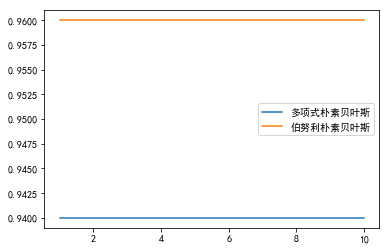

In [85]:
mnbs = []
bnbs = []
for i in range(10):
    mnb = MultinomialNB()
    mnb_s = cross_val_score(mnb,data_tf,dataSet[1],cv = 10).mean()
    mnbs.append(mnb_s)
    bnb = BernoulliNB()
    bnb_s =cross_val_score(bnb,data_tf,dataSet[1],cv = 10).mean()
    bnbs.append(bnb_s)
plt.plot(range(1,11),mnbs,label = '多项式朴素贝叶斯')
plt.plot(range(1,11),bnbs,label = '伯努利朴素贝叶斯')
plt.legend()
plt.show()